In [3]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import pyart

In [5]:
file= "/home/sofia/Documents/Pyart/Radar_Parana/data/20141004/cf/20141004/cfrad.20141004_194432.000_to_20141004_194729.389_INTA_Par_v1_SUR.nc"
radar = pyart.io.read_cfradial(file)
display = pyart.graph.RadarDisplay(radar)

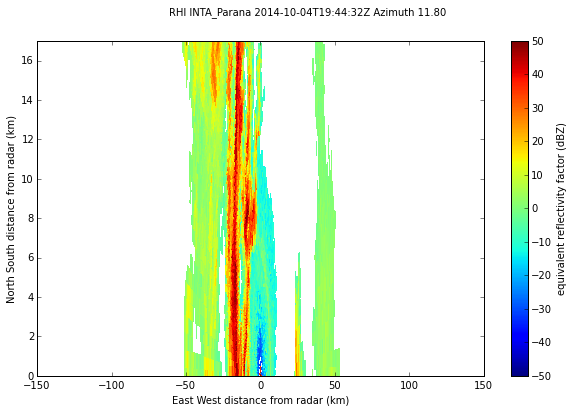

In [5]:
# fields to plot and ranges
#fields_to_plot = ['reflectivity', 'velocity']


# plot the data
#nplots = len(fields_to_plot)
#plt.figure(figsize=[5 * nplots, 4])

plt.figure(figsize=[10,6])
display.plot('dBZ', 5, vmin=-50, vmax=50, title_flag=False)
display.set_limits(ylim=[0, 17])

# set the figure title and show
radar_name = display.radar_name
time_text = ' ' + display.time_begin.isoformat() + 'Z '
azimuth = radar.fixed_angle['data'][5]
title = 'RHI ' + radar_name + time_text + 'Azimuth %.2f' % (azimuth)
plt.suptitle(title)
plt.show()

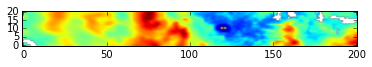

In [30]:
# perform Cartesian mapping, limit to the reflectivity field.
#grid = pyart.map.map_to_grid([radar], (1, 241, 241), ((2000, 2000), (-123000.0, 123000.0), (-123000.0, 123000.0)),
#                             grid_origin=None, fields='dBZ', refl_filter_flag=True, refl_field='dBZ')
   
grid = pyart.map.grid_from_radars(
    [radar],
    grid_shape=(21, 21, 201),
    grid_limits=((0, 20000), (-10000, 10000), (-60000, 40000)),
    fields=['dBZ'],
    refl_field='dBZ',
    max_refl=100.)

# create the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(grid.fields['dBZ']['data'][0], origin='lower')
plt.show()

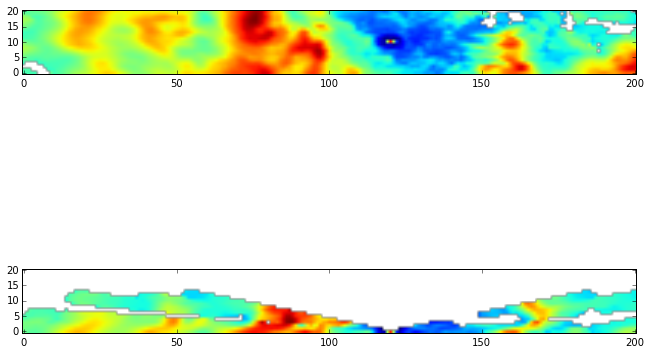

In [33]:
# create the plot
fig = plt.figure(figsize=(11,8.5))
ax = fig.add_subplot(211)
ax.imshow(grid.fields['dBZ']['data'][0], origin='lower')
ax1 = fig.add_subplot(212)
ax1.imshow(grid.fields['dBZ']['data'][:,10,:], origin='lower')

plt.show()

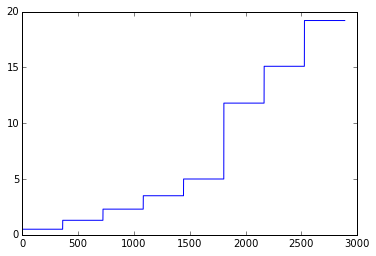

In [39]:
plt.figure() 
plt.plot(radar.elevation['data'][:])
plt.show()

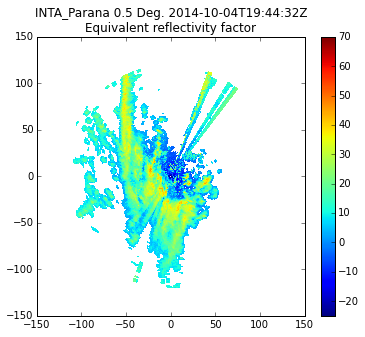

In [6]:
xlims=[-150,150]
ylims=[-150,150]

#tilt=0  #elevacion??
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(6, 5))
display.plot_ppi('dBZ', 0,
                 colorbar_label='',
                 axislabels_flag=False,vmin=-25,vmax=70)
display.set_limits(xlims,ylims)
plt.show()